# Part 3: K-Nearest Neighbors (K-NN)

## Description
A machine learning model for regression and classification.

### Algorithm:
  1. Compute the distance between the test data point and each of the training data points.
  2. Identify the 'k' nearest data points to the test data point.
  3. Perform a majority vote (for classification) or average (for regression) of these 'k' nearest points.

### Distance Metrics:
  - Euclidean Distance
  - Manhattan Distance
  - Minkowski Distance
 
The Euclidean distance between two points in Euclidean space is a measure of the length of a straight line between these two points. In a space with $ p $ dimensions, the Euclidean distance between two points, $ P $ and $ Q $, with coordinates $ P = (p_1, p_2, \ldots, p_p) $ and $ Q = (q_1, q_2, \ldots, q_p) $, is given by the formula:

$$ d(P, Q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_p - q_p)^2} $$

In a more generalized and compact form, it can be written as:

$$ d(P, Q) = \sqrt{\sum_{i=1}^{p} (p_i - q_i)^2} $$

where $ \sum $ denotes the summation and $ \sqrt{} $ denotes the square root.

> We'll dive deeper into `Manhattan` and `Minkowski` Distance in Unit 3.6: Unsupervised Learning.

### Example

If k=3, and the three closest points to a test instance are of classes A, A, and B, the algorithm would classify the test instance as class A.

![knn](../assets/knn.png)

### Choosing the Right 'k' in K-NN
**Small 'k' value**:
  - Pros: Captures the nuances in the data.
  - Cons: Sensitive to noise in the data; higher variance.

**Large 'k' value**:
  - Pros: More stable and robust to noise.
  - Cons: May oversimplify the model; higher bias.

> We'll dive deeper into this in Unit 3.5: Model Evaluation

## Hands-On: Scikit-Learn Tutorial

**Activity:** Let's apply KNN on the `diamonds` regression problem.

**Mode:** Class Walkthrough

**⚡ Task:**
- Import the `KNeighborsRegressor` library.
- Prepare the Data: Define X (`carat`) and y (`price`)
- Split into training/testing sets.
- Reshape data for the model.
- Build and test the initial Model
- Find the Best 'k' (Hyperparameter Tuning): 



In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
X = diamonds['carat']   # Feature
y = diamonds['price']   # Target

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Reshape independent variables because sklearn expects a 2D array for features
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
# Predict prices for the test set using the trained KNN regressor

y_pred = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 2368635.737538005


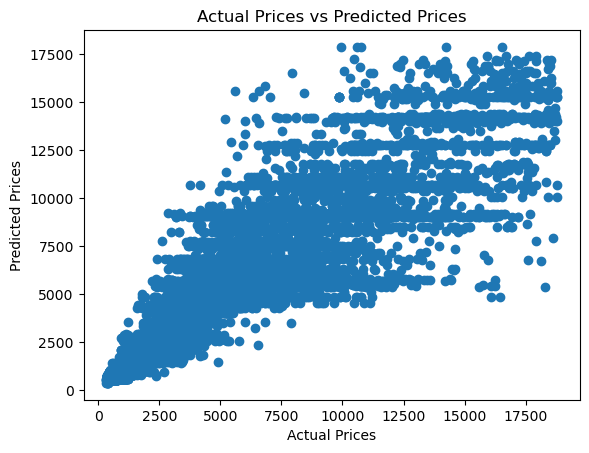

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

We can experiment with different `k` values and see how they affect the performance.

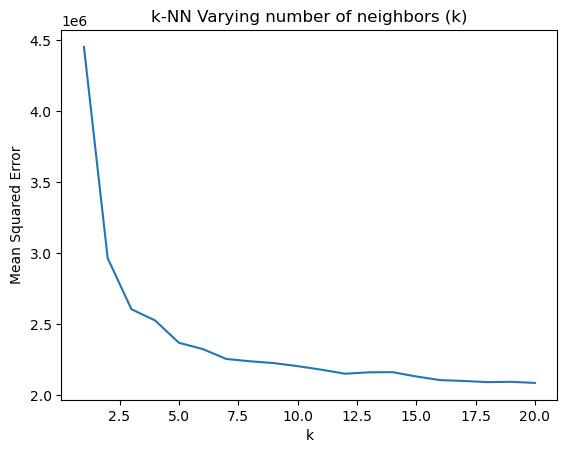

In [28]:
# Iteratively evaluate the Mean Squared Error for KNN models with neighbor values ranging 
# from 1 to 20 to determine the optimal k-parameter.

errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

plt.plot(range(1, 21), errors)
plt.title('k-NN Varying number of neighbors (k)')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.show()


## Self-Study: Exercise

Now, let's practice on the `iris` dataset for classification, without dropping class `2`. Hence, this will be a multi-class (>2) classification

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset, partition the data into training and test sets, 
# and train a K-Nearest Neighbors classifier with five neighbors.

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# Use the trained classifier to predict test set labels and evaluate the 
# model's classification accuracy.

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9777777777777777
